In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traveler-trip-data/Travel details dataset.csv


In [2]:
# Replace 'your_file.csv' with the actual file name
file_path = '/kaggle/input/traveler-trip-data/Travel details dataset.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


In [3]:
# Drop Unneeded Columns
df = df.drop(['Trip ID', 'Traveler name'], axis=1)

# Display the updated DataFrame
print(df)

                Destination Start date   End date  Duration (days)  \
0                London, UK   5/1/2023   5/8/2023              7.0   
1          Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2           Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3             New York, USA  8/15/2023  8/29/2023             14.0   
4              Tokyo, Japan  9/10/2023  9/17/2023              7.0   
..                      ...        ...        ...              ...   
134  Rio de Janeiro, Brazil   8/1/2023  8/10/2023              9.0   
135       Vancouver, Canada  8/15/2023  8/21/2023              6.0   
136       Bangkok, Thailand   9/1/2023   9/8/2023              7.0   
137        Barcelona, Spain  9/15/2023  9/22/2023              7.0   
138   Auckland, New Zealand  10/1/2023  10/8/2023              7.0   

     Traveler age Traveler gender Traveler nationality Accommodation type  \
0            35.0            Male             American              Hotel   
1    

In [4]:
#Filter only for people who traveled to Tokyo, Japan
filtered_df = df.loc[df['Destination'] == 'Tokyo, Japan']
filtered_df.shape

(7, 11)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

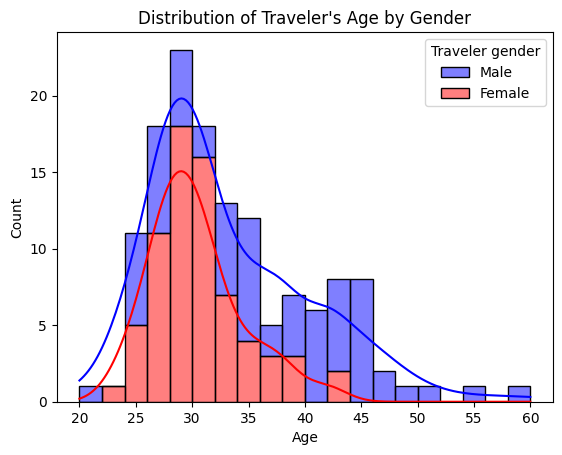

In [5]:
sns.histplot(data=df, x='Traveler age', bins=20, kde=True, hue='Traveler gender', multiple='stack', palette={'Male': 'blue', 'Female': 'red'}, stat='count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Traveler\'s Age by Gender')
plt.show()

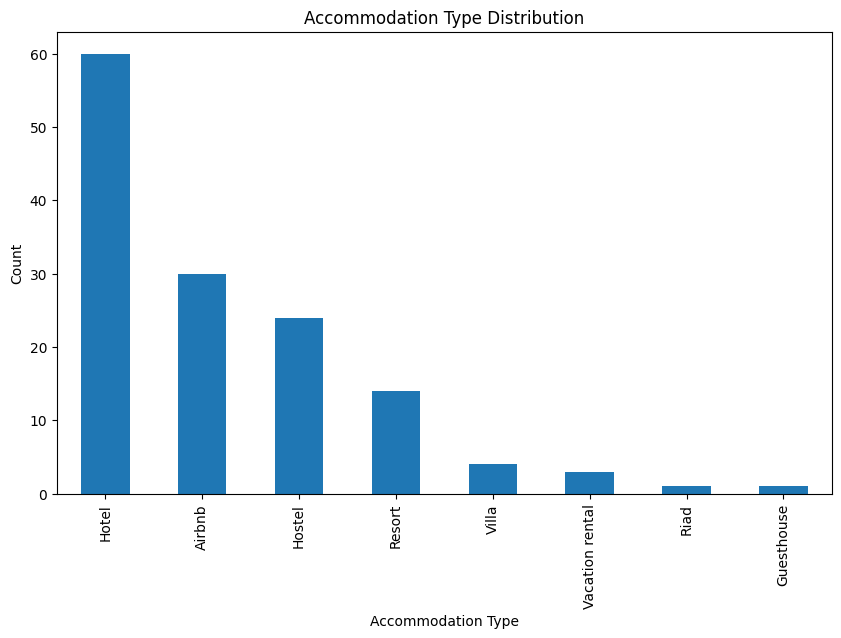

In [6]:
accommodation_counts = df['Accommodation type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
accommodation_counts.plot(kind='bar')
plt.title('Accommodation Type Distribution')
plt.xlabel('Accommodation Type')
plt.ylabel('Count')
plt.show()